In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')

In [2]:
df= pd.read_csv('creditcard.csv')

In [ ]:
df.head()

In [ ]:
sns.pairplot(df)

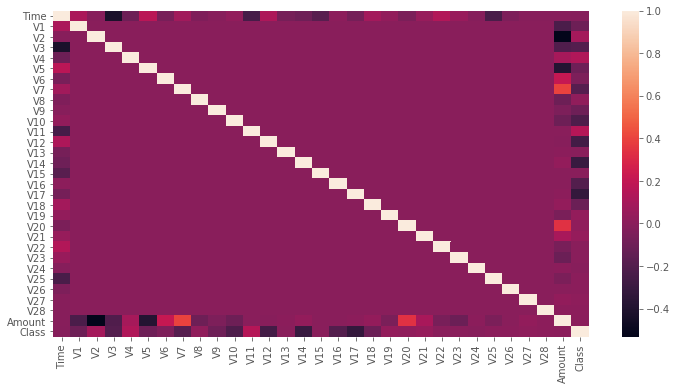

In [3]:
#Iniciando a analise exploratoria com mapa de calor para identificar as correlações entre as variaveis

plt.figure(figsize=(12,6))
sns.heatmap(df.corr());

In [4]:
#verificando valores nulos. Nesse caso não foi encontrado nenhum dado faltante ;)

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

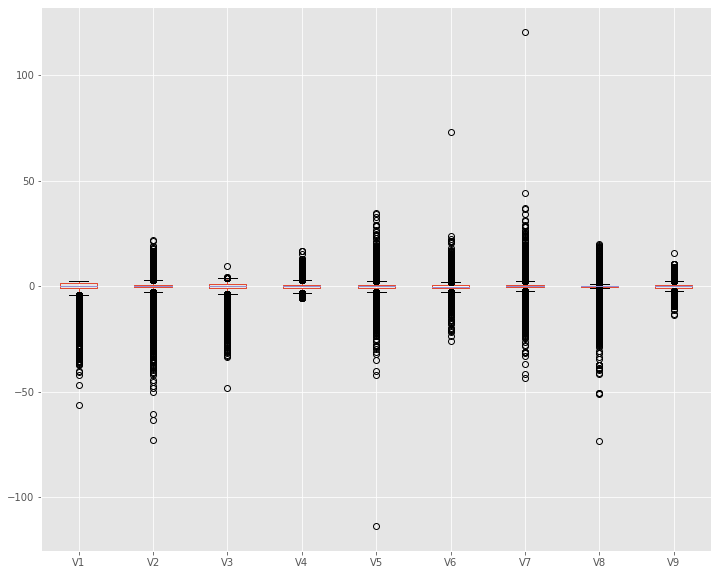

In [5]:
# Verificação de outliers no dataset através de gráficos boxplot. Há muitos outliers no dataset.

plt.figure(figsize=(12,10))
df.boxplot(column=['V1','V2','V3','V4','V5','V6','V7','V8','V9']);

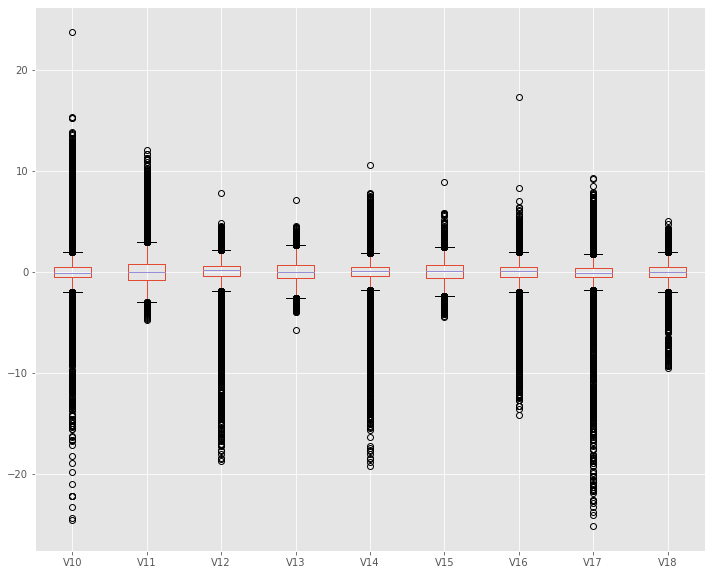

In [6]:
plt.figure(figsize=(12,10))
df.boxplot(column=['V10', 'V11','V12','V13','V14','V15','V16','V17','V18']);

In [7]:
# verificando minha proporcionalidade de classes. Para não ter um modelo tendencioso
# é necessário ter classes balanceadas para minha variável target
# É Possivel ver que o dataframe está bem desbalanceado.

df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
# Criando um dataset balanceado:

df_balanceado=pd.concat([df[df['Class']==0][0:492],df[df['Class']==1][0:492]])

In [9]:
# Agora temos um dataset balanceado
df_balanceado['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [10]:
y =df_balanceado['Class']
X =df_balanceado.iloc[:,0:-1]

In [11]:
# Split dos dados, eu utilizo o sklearn pq ele já embaralha dos dados =). O valor do random_state pode ser qualquer um
# mas é importante defini-lo para ter sempre os mesmos resultados

import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Treinando meu algotimo com Random Forest

clf = RandomForestClassifier(max_depth=2, random_state=42, n_jobs=1)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [21]:
# bade de treino
y_pred = clf.predict(X_train)
y_true = y_train
print("acuracia de treinamento:"+str(accuracy_score(y_true,y_pred)))

# base de teste
x_pred = clf.predict(X_test)
x_true = y_test
print("acuracia de teste:"+str(accuracy_score(x_true,x_pred)))


acuracia de treinamento:0.9825581395348837
acuracia de teste:0.9763513513513513


In [25]:
#A curva ROC mostra o quão bom o modelo criado pode distinguir entre duas coisas (já que é utilizado para classificação)

# score em treino
print("Curva ROC AUC score treino:"+ str(roc_auc_score(y_true, y_pred)))

#score teste
print("Curva ROC AUC score teste:" + str(roc_auc_score(x_true, x_pred)))

Curva ROC score treino:0.9826251563397898
Curva ROC score teste:0.976027397260274
